### Introduction:
I am using the kaggle data set found in https://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download. My goal is to create a model to determine avocado prices given certain specs. I want to find what conditions give us the most profit. Meaning highest price times highest volume.

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [2]:
avcd = pd.read_csv('data_sets/avocado.csv')
avcd.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avcd = avcd.drop(columns='Unnamed: 0')
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avcd.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
avcd['Date'] = pd.to_datetime(avcd['Date'], format='%Y-%m-%d')
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avcd.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Let us check for null values that we would have to clean

In [7]:
avcd.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values. Let's explore a bit

In [8]:
avcd.mean()

C:\Users\matth\AppData\Local\Temp/ipykernel_36664/3304064990.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avcd.mean()
C:\Users\matth\AppData\Local\Temp/ipykernel_36664/3304064990.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avcd.mean()


AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

Something that I would like to explore is the relationship between average price and total volume. With the theory of supply and demand, we should expect there to be a relation where as value goes up, price goes down. Let us see if that holds.

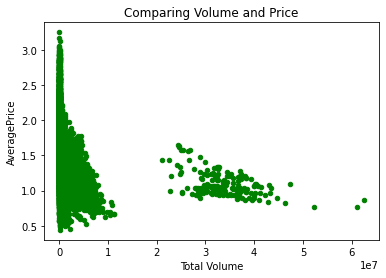

In [9]:
avcd.plot.scatter(x='Total Volume', y='AveragePrice', title='Comparing Volume and Price', color='green')
plt.savefig('pics/Comparing_Volume_and_Price.png')

While the trend isn't too strong, we do see a slight confimation of the theory. As the volume increases, the price of Avocados.

We are given 3 PLU numbers. The PLU number for an avocado indicates to retailers what type of avocados are being sold. We have PLU numbers of 4046, 4225, and 4770.

For reference:
4046: 3-5 oz,
4225: 8-10 oz,
4770: 10-15 oz,

Read more about it here: https://loveonetoday.com/how-to/identify-hass-avocados/

Given this information, I would like to make a new column called total_oz. In total_oz, I will add 4 for every 4046 avocado, 9 for every 4225 avocado, and 12.5 for every 4770 avocado. I will then compare this column to price and volume to see if there is any correlation. 

In [10]:
avcd['total_oz'] = avcd['4046'].map(lambda x: 4*x) + avcd['4225'].map(lambda x: 9*x) + avcd['4770'].map(lambda x: 12.5*x)
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680


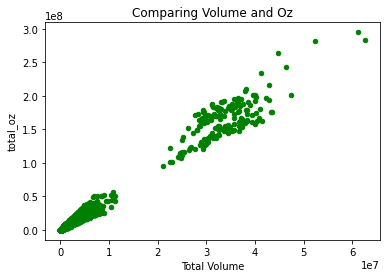

In [11]:
avcd.plot.scatter(x='Total Volume', y='total_oz', title='Comparing Volume and Oz', color='green')
plt.savefig('pics/Comparing_Volume_and_Oz.png')

Not surprisingly, we see a strong corellation between volume and total_oz

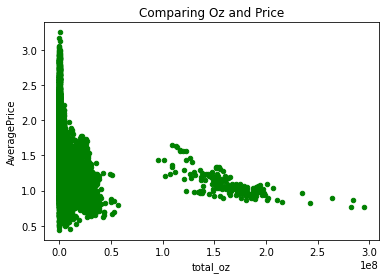

In [12]:
avcd.plot.scatter(x='total_oz', y='AveragePrice', title='Comparing Oz and Price', color='green')
plt.savefig('pics/Comparing_Oz_and_Price.png')

We see a similar trend here as we did when comparing price and volume.

Next we have total bags, small bags, large bags, and XL bags. We would expect the more bags there are, the greater the volume is. This should be even more so the case with XL bags. Let's quickly compare bags with volume and price. 

Starting with volume

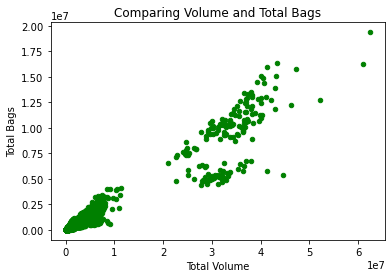

In [13]:
avcd.plot.scatter(x='Total Volume', y='Total Bags', title='Comparing Volume and Total Bags', color='green')
plt.savefig('pics/Comparing_Volume_and_Total_Bags.png')

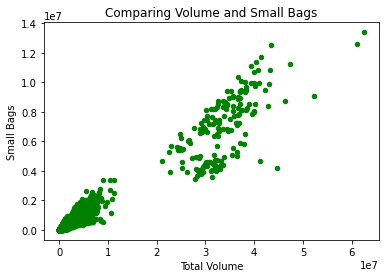

In [14]:
avcd.plot.scatter(x='Total Volume', y='Small Bags', title='Comparing Volume and Small Bags', color='green')
plt.savefig('pics/Comparing_Volume_and_Small_Bags.png')

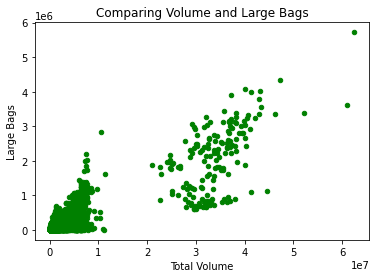

In [15]:
avcd.plot.scatter(x='Total Volume', y='Large Bags', title='Comparing Volume and Large Bags', color='green')
plt.savefig('pics/Comparing_Volume_and_Large_Bags.png')

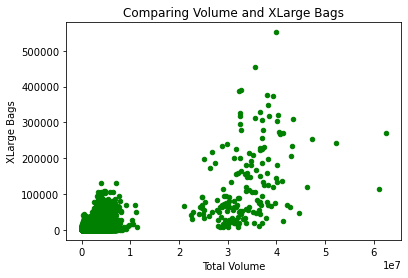

In [16]:
avcd.plot.scatter(x='Total Volume', y='XLarge Bags', title='Comparing Volume and XLarge Bags', color='green')
plt.savefig('pics/Comparing_Volume_and_XLarge_Bags.png')

Not surprisingly, the more bags there are, the higher the volume. What is surprising however, is that as the bags increase in size, the correlation between number of bags and volume becomes less clear. 

What this tells me is that the majority of bags are small bags. This becomes evident in the fact that the chart comparing volume with total bags is almost the same as the chart comparing volume with small bags.

Now is time to compare bags with price.

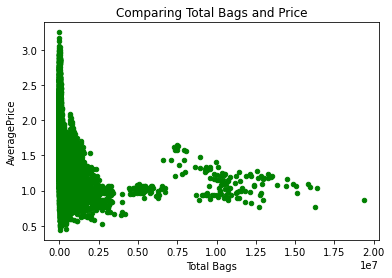

In [17]:
avcd.plot.scatter(x='Total Bags', y='AveragePrice', title='Comparing Total Bags and Price', color='green')
plt.savefig('pics/Comparing_Total_Bags_and_Price.png')

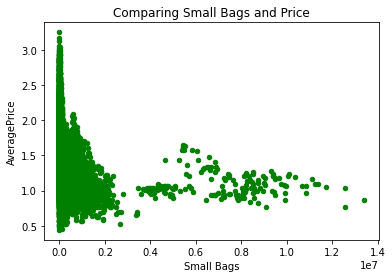

In [18]:
avcd.plot.scatter(x='Small Bags', y='AveragePrice', title='Comparing Small Bags and Price', color='green')
plt.savefig('pics/Comparing_Small_Bags_and_Price.png')

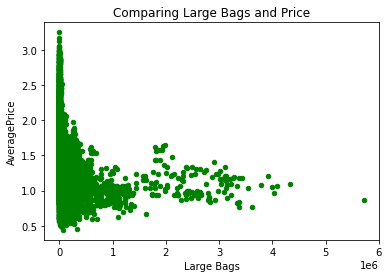

In [19]:
avcd.plot.scatter(x='Large Bags', y='AveragePrice', title='Comparing Large Bags and Price', color='green')
plt.savefig('pics/Comparing_Large_Bags_and_Price.png')

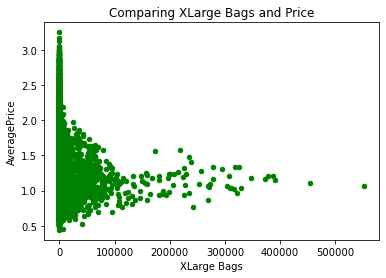

In [20]:
avcd.plot.scatter(x='XLarge Bags', y='AveragePrice', title='Comparing XLarge Bags and Price', color='green')
plt.savefig('pics/Comparing_XLarge_Bags_and_Price.png')

There doesn't seem to be a correlation between bag count and avocado price.

We are given the dates so I want to see how season effects avocado volume and price.

In [21]:
avcd['Month'] = avcd['Date'].dt.month
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680,11


In [22]:
avcd.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
total_oz               float64
Month                    int64
dtype: object

In [23]:
month_names = {1: '01 Jan', 2: '02 Feb', 3: '03 Mar', 4: '04 Apr', 5: '05 May', 6: '06 Jun',
               7: '07 Jul', 8: '08 Aug', 9: '09 Sep', 10: '10 Oct', 11: '11 Nov', 12: '12 Dec'}
avcd['Month'] = avcd['Month'].replace(month_names)
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610,12 Dec
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535,12 Dec
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080,12 Dec
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940,12 Dec
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680,11 Nov


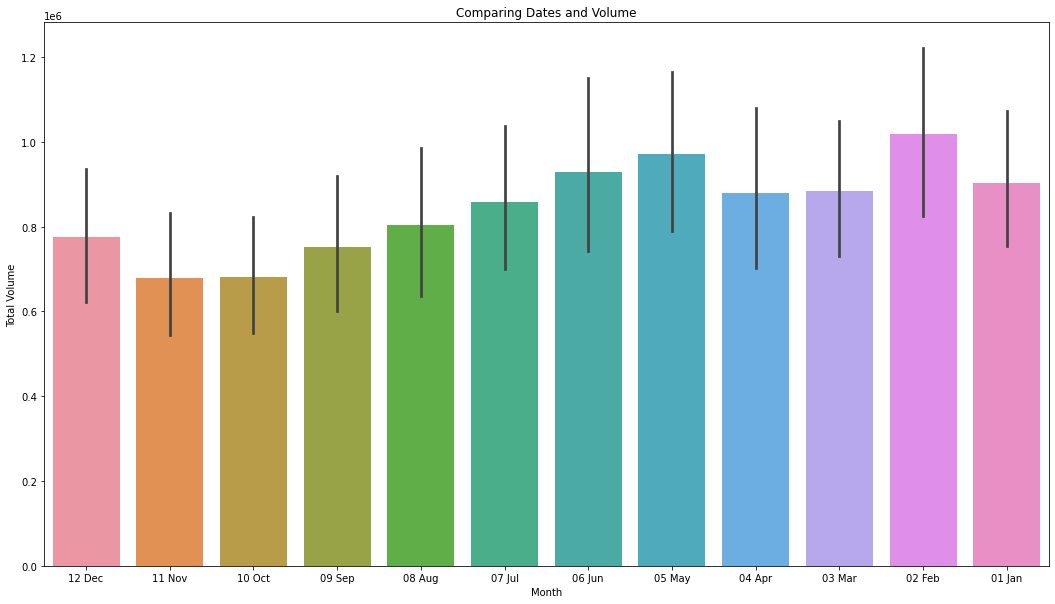

In [24]:
plt.figure(figsize=(18,10))
plt.title('Comparing Dates and Volume')
sns.barplot(data=avcd, x='Month', y='Total Volume')
plt.savefig('pics/Comparing_Dats_and_Volume.png')

This charts shows the months of the year in backwars order. We see that the volume yield is lowest in the fall and highest in the spring time (also in February)

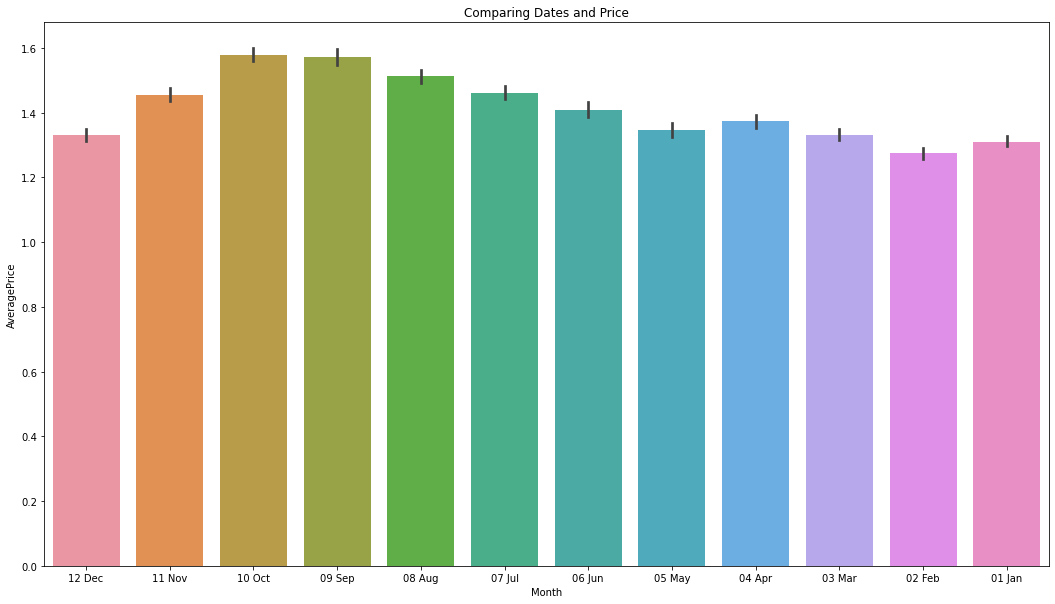

In [25]:
plt.figure(figsize=(18,10))
plt.title('Comparing Dates and Price')
sns.barplot(data=avcd, x='Month', y='AveragePrice')
plt.savefig('pics/Comparing_Dates_and_Price.png')

Not surprisingly, as the yield of avocados decrease in the fall months, the price of avocados increases.

We are given the type and the region for the avocados. The type just tells us if the Avocados are organic or not. The region tells us which region the avocados were sold.

In [26]:
avcd['type'].unique()

array(['conventional', 'organic'], dtype=object)

<AxesSubplot:title={'center':'Comparing Types and Volume'}, xlabel='type', ylabel='Total Volume'>

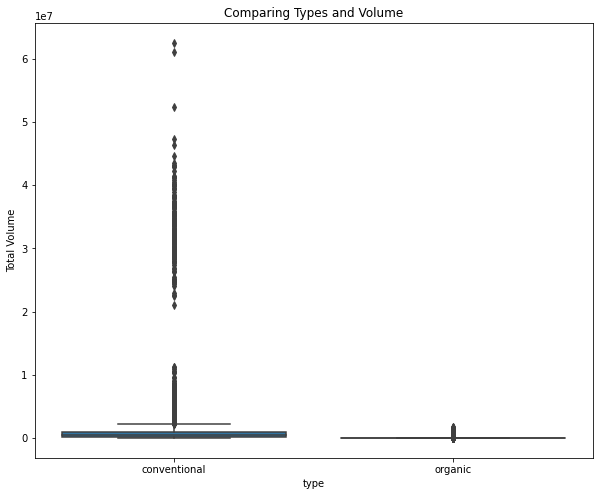

In [27]:
plt.figure(figsize=(10,8))
plt.title('Comparing Types and Volume')
sns.boxplot(data=avcd, x='type', y='Total Volume')

Too many outliers to see the data properly. Let's zoom in a bit

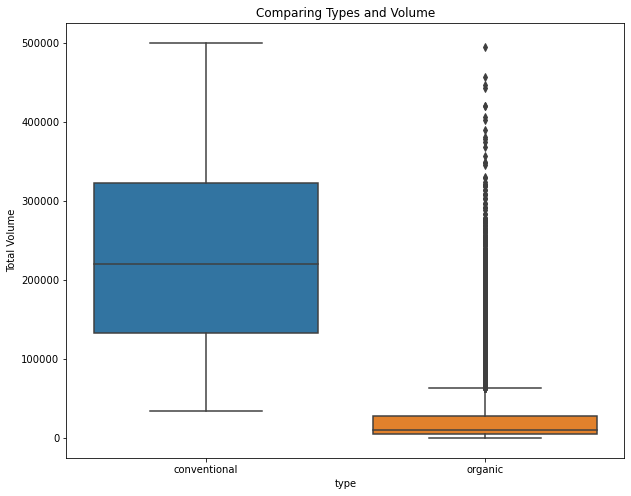

In [28]:
plt.figure(figsize=(10,8))
plt.title('Comparing Types and Volume')
sns.boxplot(data=avcd[avcd['Total Volume'] < 500000], x='type', y='Total Volume')
plt.savefig('pics/Comparing_Types_and_Volume.png')

As we can see, the conventional avocados typically yield a bigger yield than the organic ones. This in turn should mean that the organic avocados should be priced higher. Let's see

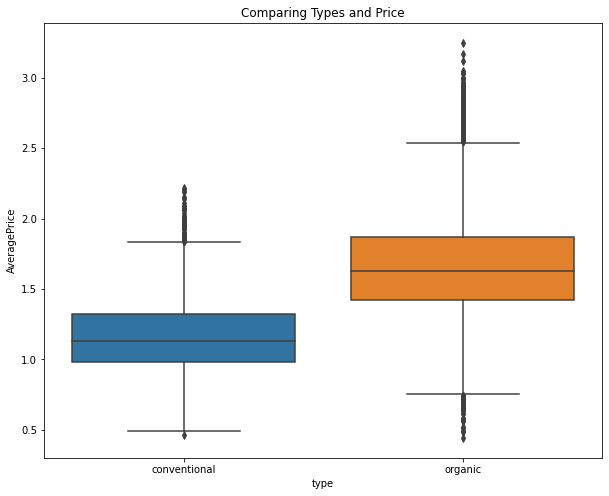

In [29]:
plt.figure(figsize=(10,8))
plt.title('Comparing Types and Price')
sns.boxplot(data=avcd, x='type', y='AveragePrice')
plt.savefig('pics/Comparing_Types_and_Price.png')

This confirms that indeed, organic avocados generally more expensive than nonorganic avocados.

In [30]:
avcd['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

These are a lot of regions to look at so let us combine them into super regions

In [31]:
super_region = {'Albany': 'NorthEast', 'Atlanta': 'SouthEast', 'BaltimoreWashington': 'NorthEast', 'Boise': 'Mountains', 
                'Boston': 'NorthEast',
       'BuffaloRochester': 'NorthEast', 'California': 'WestCoast', 'Charlotte': 'SouthEast', 'Chicago': 'MidWest',
       'CincinnatiDayton': 'MidWest', 'Columbus': 'MidWest', 'DallasFtWorth': 'SouthEast', 'Denver': 'Mountains',
       'Detroit': 'MidWest', 'GrandRapids': 'MidWest', 'GreatLakes': 'MidWest', 'HarrisburgScranton': 'NorthEast',
       'HartfordSpringfield': 'NorthEast', 'Houston': 'SouthEast', 'Indianapolis': 'MidWest', 'Jacksonville': 'SouthEast',
       'LasVegas': 'SouthWest', 'LosAngeles': 'WestCoast', 'Louisville': 'MidWest', 'MiamiFtLauderdale': 'SouthEast',
       'Midsouth': 'SouthEast', 'Nashville': 'SouthEast', 'NewOrleansMobile': 'SouthEast', 'NewYork': 'NorthEast',
       'Northeast': 'NorthEast', 'NorthernNewEngland': 'NorthEast', 'Orlando': 'SouthEast', 'Philadelphia': 'NorthEast',
       'PhoenixTucson': 'SouthWest', 'Pittsburgh': 'NorthEast', 'Plains': 'MidWest', 'Portland': 'WestCoast',
       'RaleighGreensboro': 'SouthEast', 'RichmondNorfolk': 'SouthEast', 'Roanoke': 'SouthEast', 'Sacramento': 'WestCoast',
       'SanDiego': 'WestCoast', 'SanFrancisco': 'WestCoast', 'Seattle': 'WestCoast', 'SouthCarolina': 'SouthEast',
       'SouthCentral': 'SouthEast', 'Southeast': 'SouthEast', 'Spokane': 'WestCoast', 'StLouis': 'Midwest', 'Syracuse': 'NorthEast',
       'Tampa': 'SouthEast', 'TotalUS': 'TotalUS', 'West': 'WestCoast', 'WestTexNewMexico': 'SouthWest'}
avcd['super_region'] = avcd['region'].replace(super_region)
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz,Month,super_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610,12 Dec,NorthEast
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535,12 Dec,NorthEast
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080,12 Dec,NorthEast
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940,12 Dec,NorthEast
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680,11 Nov,NorthEast


<AxesSubplot:title={'center':'Comparing Regions and Volume'}, xlabel='super_region', ylabel='Total Volume'>

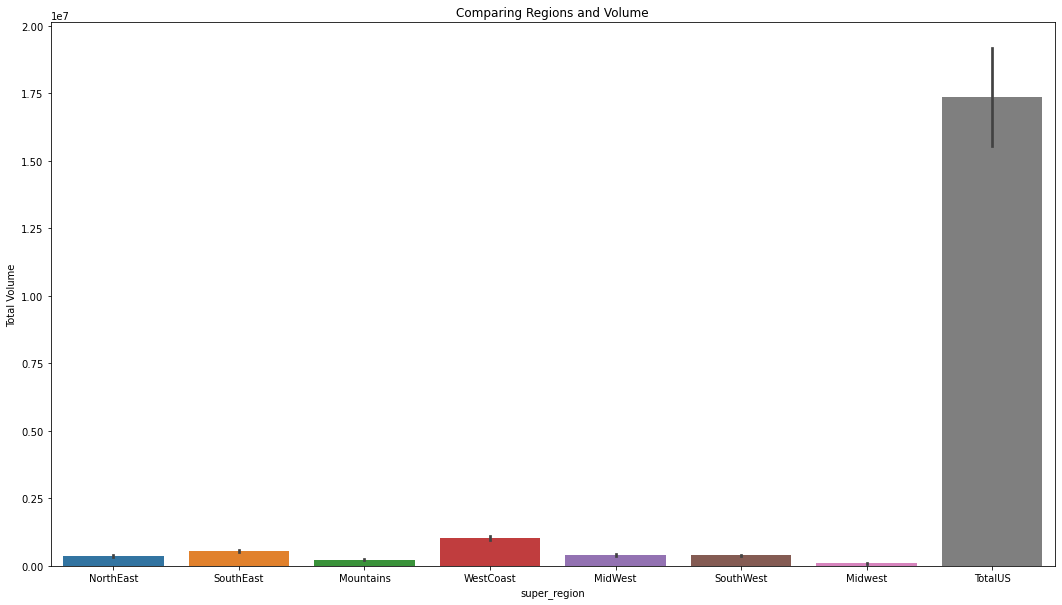

In [32]:
plt.figure(figsize=(18,10))
plt.title('Comparing Regions and Volume')
sns.barplot(data=avcd, x='super_region', y='Total Volume')

TotalUS makes everything else look small so let us get rid of it

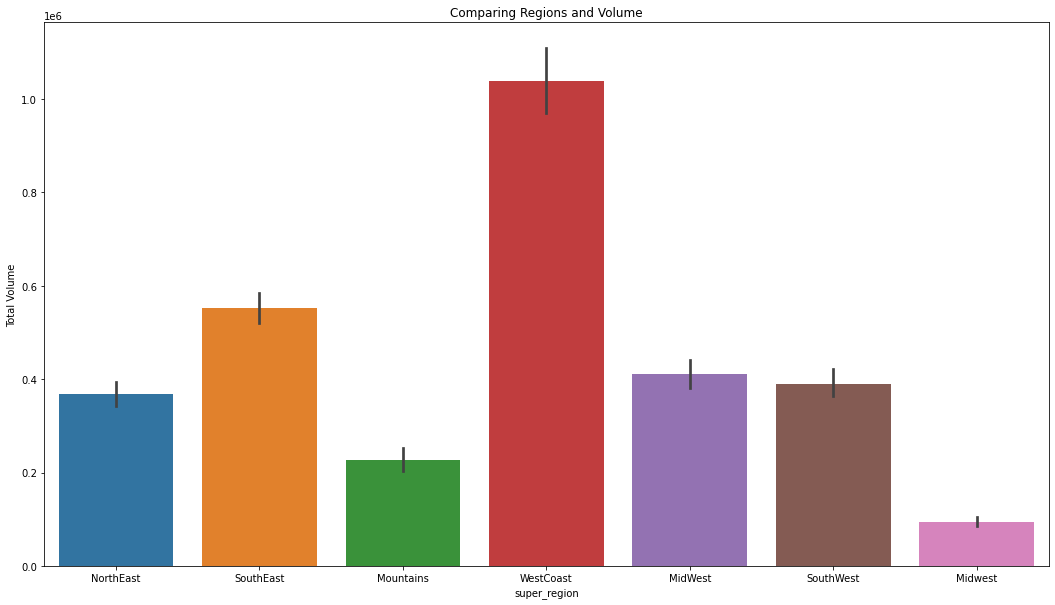

In [33]:
plt.figure(figsize=(18,10))
plt.title('Comparing Regions and Volume')
sns.barplot(data=avcd[avcd['super_region'] != 'TotalUS'], x='super_region', y='Total Volume')
plt.savefig('pics/Comparing_Regions_and_Volume.png')

We see that the west coast buys the most avocados and that they almost double the second place super region (south east). The midwest buys the least amount of avocados

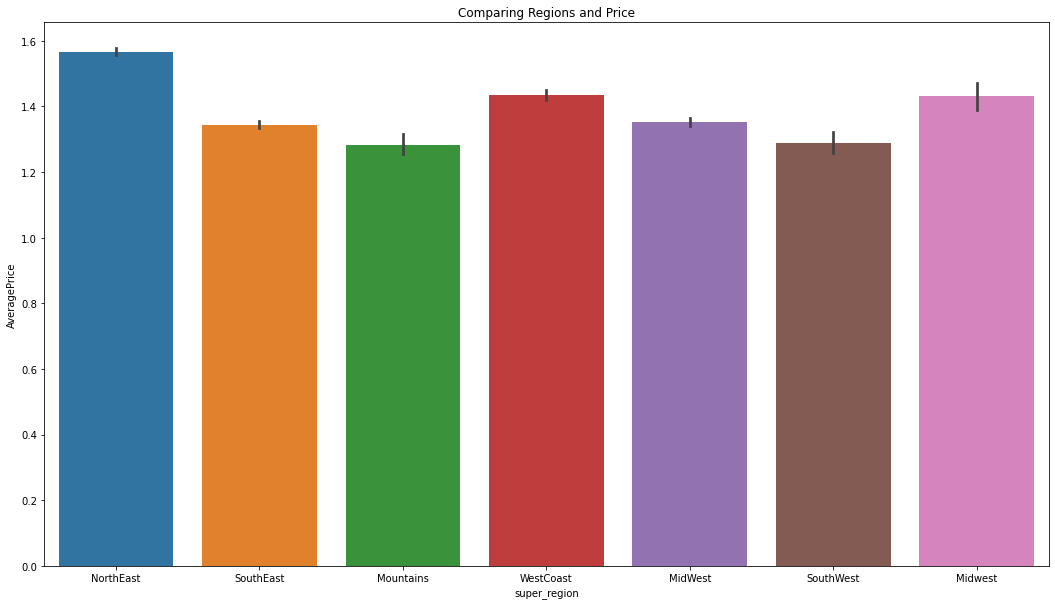

In [34]:
plt.figure(figsize=(18,10))
plt.title('Comparing Regions and Price')
sns.barplot(data=avcd[avcd['super_region'] != 'TotalUS'], x='super_region', y='AveragePrice')
plt.savefig('pics/Comparing_Regions_and_Price.png')

The price doesn't seem to change much region to region. Although, the North East is the super region with the highest priced avocados.

The last bit of exploratory data I want to look at is a heatmap. To do this though we need a metric to compare too.

Since we are trying to find price times volume, I will make a new column called revenue that finds just that. I will make a heatmap afterwords that looks to compare variables to this metric.

In [35]:
avcd['revenue'] = avcd['AveragePrice']*avcd['Total Volume']
avcd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz,Month,super_region,revenue
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610,12 Dec,NorthEast,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535,12 Dec,NorthEast,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080,12 Dec,NorthEast,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940,12 Dec,NorthEast,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680,11 Nov,NorthEast,65330.6880


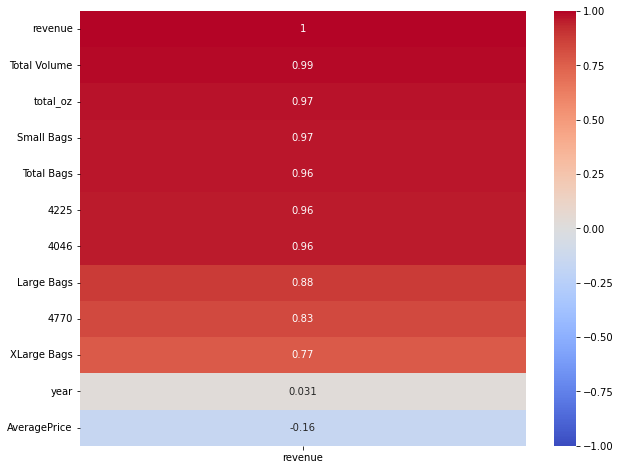

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(avcd.corr()[['revenue']].sort_values(by='revenue',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');
plt.savefig('pics/heatmap1.png')

We see some remarkable findings here. First off, Total Volume is extreamly correlated with revenue while average price doesn't have much or a correlation. That means volume needs to be high, and it doesn't matter the price we sell them at. 

Also we see huge correlation with total_oz, small bags, total bags, 4225 and 4046. And while not as huge, there is still a large correlated value in revenue with large bags, 4770, and XLarge Bags.

Before constructing the model, I want to include the super region, months, and type into the equation. As mentioned before, the TotalUS throughs everything off, so I will discard it. Besides that I will make dummy variables for these 3 columns and make another heat map. Afterwords I will work on my model

In [37]:
avcd2 = avcd[avcd['super_region'] != 'TotalUS']
avcd2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,total_oz,Month,super_region,revenue
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,494842.610,12 Dec,NorthEast,85434.7046
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,405175.535,12 Dec,NorthEast,74083.9230
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,987157.080,12 Dec,NorthEast,109944.8046
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,653222.940,12 Dec,NorthEast,85311.5220
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,399258.680,11 Nov,NorthEast,65330.6880


In [38]:
avcd2_dummies = pd.get_dummies(avcd2, columns=['super_region', 'type', 'Month'], drop_first=False)
avcd2_dummies.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,Month_03 Mar,Month_04 Apr,Month_05 May,Month_06 Jun,Month_07 Jul,Month_08 Aug,Month_09 Sep,Month_10 Oct,Month_11 Nov,Month_12 Dec
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,1,0


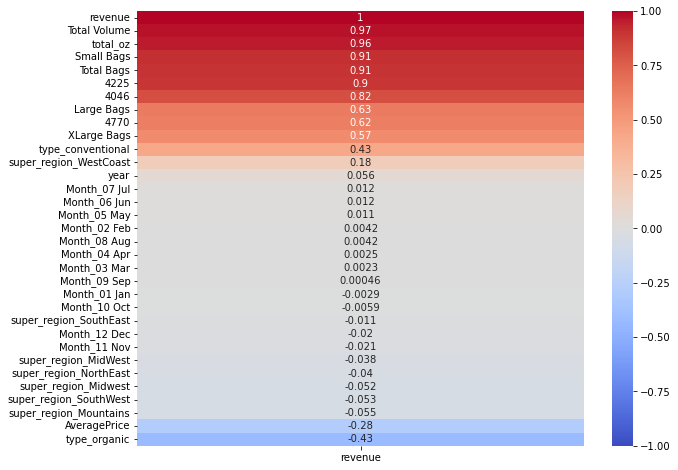

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(avcd2_dummies.corr()[['revenue']].sort_values(by='revenue',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');
plt.savefig('pics/heatmap_revenue.png')

Seems that the regions and months don't have a strong correlation to revenue. Interestingly, conventional avocados increase revenue while organic ones decrease it.

Now time to start our model. Let's start by making our X and y variables.

In [40]:
#I kept editing this until I got the optimal results
xvars = ['Total Volume', 'total_oz', 'Small Bags', 'Total Bags', '4225']
X = avcd2_dummies[xvars]
X.head()

,Total Volume,total_oz,Small Bags,Total Bags,4225
0,64236.62,494842.610,8603.62,8696.87,54454.85
1,54876.98,405175.535,9408.07,9505.56,44638.81
2,118220.22,987157.080,8042.21,8145.35,109149.67
3,78992.15,653222.940,5677.40,5811.16,71976.41
4,51039.60,399258.680,5986.26,6183.95,43838.39


In [41]:
y = avcd2_dummies['revenue']
y.head()

0     85434.7046
1     74083.9230
2    109944.8046
3     85311.5220
4     65330.6880
Name: revenue, dtype: float64

In [42]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [43]:
X_poly = poly.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.9674007936674592
Testing R2: 0.9601790654220247


The model shows that to maximize revenue, we should grow as many 4225 (8-10 oz) avocados as possible, and ship them in small bags. This gives us an R^2 score of 96.0% and isn't over or under fit.

Finally, we need to find out what price to sell the avocados at. I'll make another linear regression model to do that. But first let us create another heat map to see what correlates with price.

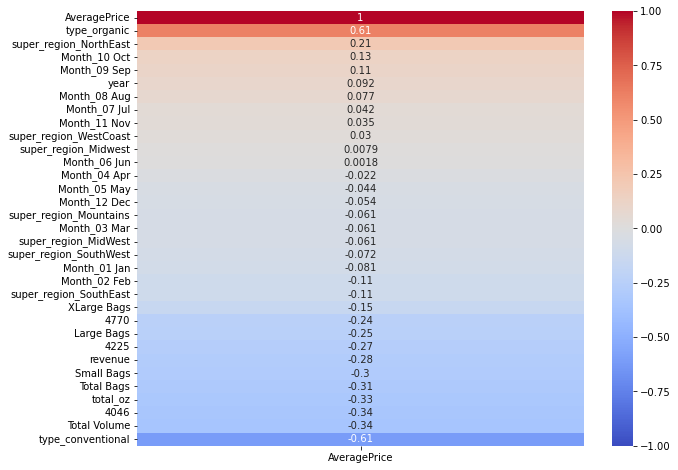

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(avcd2_dummies.corr()[['AveragePrice']].sort_values(by='AveragePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');
plt.savefig('pics/heatmap_price.png')

The main indicator of high price seems to be wheather or not the avocado is organic (organic raises the price)

In [49]:
#I kept editing this until I got the optimal results. I purposely excluded the revenue as it is impossible to know what that
#is without the price that we are trying to find.
xvars = ['type_organic', 'type_conventional', 'Total Volume', '4046', 'total_oz', 'Total Bags', 'Small Bags', '4225',
         'Large Bags', '4770', 'super_region_NorthEast', 'XLarge Bags', 'Month_10 Oct']
X = avcd2_dummies[xvars]
X.head()

,type_organic,type_conventional,Total Volume,4046,total_oz,Total Bags,Small Bags,4225,Large Bags,4770,super_region_NorthEast,XLarge Bags,Month_10 Oct
0,0,1,64236.62,1036.74,494842.610,8696.87,8603.62,54454.85,93.25,48.16,1,0.0,0
1,0,1,54876.98,674.28,405175.535,9505.56,9408.07,44638.81,97.49,58.33,1,0.0,0
2,0,1,118220.22,794.70,987157.080,8145.35,8042.21,109149.67,103.14,130.50,1,0.0,0
3,0,1,78992.15,1132.00,653222.940,5811.16,5677.40,71976.41,133.76,72.58,1,0.0,0
4,0,1,51039.60,941.48,399258.680,6183.95,5986.26,43838.39,197.69,75.78,1,0.0,0


In [50]:
y = avcd2_dummies['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [51]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [52]:
X_poly = poly.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.490479504692509
Testing R2: 0.47855765487960833


This model isn't as accurate as the last model. It only has an R^2 of 47.9%. Still, it isn't over or under fit.

What it tells us is that we should sell organic avocados at a higher price than nonorganic ones, that the higher the volume of avocados, the lower the price, that we sell them at a higher price in the north east, and finally, that the month of October increases price on avocados.

### Conclusion:
My proposal is that we put all of our effort into growing as high volume of 4225 (8-10 oz) avocados as posible and to ship them in small bags. This will increase revenue for the company as well as bring down cost for the customer

Going forword, I would like information on the cost of growing avocados. Given this set of information, I was only able to calculate revenue. However, to find the profit margin, we need both revenue and cost.